<a href="https://colab.research.google.com/github/CosmonautAri/status_parser_for_mom/blob/main/mom_csv_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# Getting Started

To start, upload the csv file you want parsed to the session storage, using the indicated button.

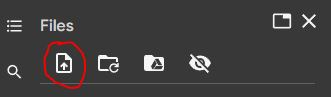

Be sure to name it "mom_file.csv", or otherwise change the name of the file in the below cell to match your uploaded file.

After that, just hit "run all" as indicated below.

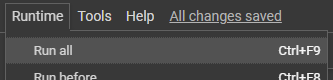

When the program is finished, hit the refresh button on session storage.

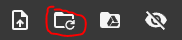

Your new file will be saved there as "current_status.csv". Right-click save it and open it in your program of preference. Enjoy :)

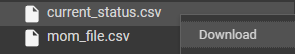

In [20]:
# loading the dataset; by default the name is "mom_file.csv"
# change it to the name of your file if you don't rename it in
# session storage
data = pd.read_csv("mom_file.csv")

In [3]:
# looking at what's contained in the file
data.describe()

,Item No.,Rev.,Link to Sutmittal file,Notes and Comments,Turnaround Period [Days],NLT
count,0.0,7.000000,0.0,0.0,7.0,7.000000
mean,NaN,0.857143,NaN,NaN,21.0,2.428571
std,NaN,0.899735,NaN,NaN,0.0,1.133893
min,NaN,0.000000,NaN,NaN,21.0,2.000000
25%,NaN,0.000000,NaN,NaN,21.0,2.000000
50%,NaN,1.000000,NaN,NaN,21.0,2.000000
75%,NaN,1.500000,NaN,NaN,21.0,2.000000
max,NaN,2.000000,NaN,NaN,21.0,5.000000


In [4]:
# looking at the top of the data
data.head()

,Item No.,VA Submittal No.,Rev.,Title,Transmittal No.,VA File No.,Specification Section,Engineering Discipline,Status,Responsible Contractor/Sent by,...,Approvers,Date Sent to Approvers,Date Recived from Approvers,Assigned to,Date Assined to VA review,Date sent to Contractor,Link to Sutmittal file,Notes and Comments,Turnaround Period [Days],NLT
0,NaN,632-X1-XX1,0,Test1,1XX-1XX-1XX,632-X1-XX1.0,X1-X1-X1,General,REVISE AND RESUBMIT,AA,...,A/E1,03/12/23,03/22/23,VA_AA,03/23/23,03/30/23,NaN,NaN,21,2
1,NaN,632-X1-XX1,1,Test1,1XX-1XX-1X1,632-X1-XX1.1,X1-X1-X1,General,REVISE AND RESUBMIT,AA,...,A/E1,04/12/23,04/22/23,VA_AA,04/23/23,04/30/23,NaN,NaN,21,2
2,NaN,632-X1-XX1,2,Test1,1XX-1XX-1X1,632-X1-XX1.1,X1-X1-X1,General,APPROVED,AA,...,A/E1,05/12/23,05/22/23,VA_AA,05/23/23,05/30/23,NaN,NaN,21,2
3,NaN,632-X1-XX2,0,Test2,1XX-1XX-2XX,632-X1-XX2.0,X1-X1-X1,General,REVISE AND RESUBMIT,bb,...,A/E1,03/12/23,03/22/23,VA_AA,03/23/23,03/30/23,NaN,NaN,21,2
4,NaN,632-X1-XX2,1,Test2,1XX-1XX-2XX,632-X1-XX2.1,X1-X1-X1,General,REVISE AND RESUBMIT,bb,...,A/E2,04/12/23,04/22/23,VA_AA,04/23/23,04/30/23,NaN,NaN,21,2


In [5]:
# let's drop the collumns we don't need
working_data = data.drop(columns=["Item No.", 
          "Specification Section", 
          "Engineering Discipline",  
          "Responsible Contractor/Sent by", 
          "Date Recived by VA",
          "Approvers",
          "Date Sent to Approvers",
          "Date Recived from Approvers",
          "Assigned to",
          "Date Assined to VA review",
          "Date sent to Contractor",
          "Link to Sutmittal file",
          "Notes and Comments",
          "Turnaround Period [Days]",
          "NLT"], axis=1)

# Goal Outline

Our goal is to find the most recent submittal of a given project. We can do this by finding items with duplicate VA submittal numbers, finding the most recent version, then returning the status associated with it.

We also want to return this as a CSV containing all the current statuses of all projects in the file.

First, let's find items with duplicate submittal numbers, and find their indexes. Indeces? You know what I mean.

# Finding Duplicate Submittal Numbers

We can use the pandas module's `duplicated` method to find duplicates in the dataframe, and use the `subset` parameter to have it only check for a certain column -- namely, the VA Submittal No. column. We will also use the `keep` parameter to specify the last occurance of a duplicate with the "last" keyword. This will return the last duplicate as `False`. We can add this to our working dataframe as a new column, which we will title "Duplicate".

In [6]:
working_data["Duplicate"] = working_data.duplicated(subset="VA Submittal No.", keep="last")

In [7]:
# check to make sure it worked as intended
working_data.head(10)

,VA Submittal No.,Rev.,Title,Transmittal No.,VA File No.,Status,Duplicate
0,632-X1-XX1,0,Test1,1XX-1XX-1XX,632-X1-XX1.0,REVISE AND RESUBMIT,True
1,632-X1-XX1,1,Test1,1XX-1XX-1X1,632-X1-XX1.1,REVISE AND RESUBMIT,True
2,632-X1-XX1,2,Test1,1XX-1XX-1X1,632-X1-XX1.1,APPROVED,False
3,632-X1-XX2,0,Test2,1XX-1XX-2XX,632-X1-XX2.0,REVISE AND RESUBMIT,True
4,632-X1-XX2,1,Test2,1XX-1XX-2XX,632-X1-XX2.1,REVISE AND RESUBMIT,True
5,632-X1-XX2,2,Test2,1XX-1XX-2XX,632-X1-XX2.2,APPROVED AS NOTED,False
6,632-X1-XX3,0,Test3,1XX-1XX-3XX,632-X1-XX3.1,UNDER REVIEW,False


# Creating A Return Dataframe

Great, it worked. Now let's iterate through the working dataframe, picking up any entries that have `False` in the Duplicate column, and use their index number to add the entry from the original dataframe to a new return dataframe.

In [8]:
# construct a new pandas dataframe that will be our return
return_data = pd.DataFrame(columns=['Item No.', 
        'VA Submittal No.', 
        'Rev.', 
        'Title', 
        'Transmittal No.',
        'VA File No.', 
        'Specification Section', 
        'Engineering Discipline',
        'Status', 
        'Responsible Contractor/Sent by', 
        'Date Recived by VA',
        'Approvers', 
        'Date Sent to Approvers', 
        'Date Recived from Approvers',
        'Assigned to', 
        'Date Assined to VA review', 
        'Date sent to Contractor',
        'Link to Sutmittal file', 
        'Notes and Comments',
        'Turnaround Period [Days]', 
        'NLT'])

In [9]:
r = []

In [10]:
# iterate through the dataframe
for i in range(len(working_data)):
  if working_data.at[i, "Duplicate"] == False:
    r.append(data.iloc[i])
    #return_data.join(r)
    #return_data.append(other=data.iloc[i])

In [11]:
print(r)

[Item No.                                   NaN
VA Submittal No.                    632-X1-XX1
Rev.                                         2
Title                                    Test1
Transmittal No.                    1XX-1XX-1X1
VA File No.                       632-X1-XX1.1
Specification Section                 X1-X1-X1
Engineering Discipline                 General
Status                                APPROVED
Responsible Contractor/Sent by              AA
Date Recived by VA                    05/10/23
Approvers                                 A/E1
Date Sent to Approvers                05/12/23
Date Recived from Approvers           05/22/23
Assigned to                              VA_AA
Date Assined to VA review             05/23/23
Date sent to Contractor               05/30/23
Link to Sutmittal file                     NaN
Notes and Comments                         NaN
Turnaround Period [Days]                    21
NLT                                          2
Name: 2, dty

In [12]:
return_data = pd.concat([return_data, pd.DataFrame(r)], ignore_index = True)

In [13]:
print(return_data)

  Item No. VA Submittal No. Rev.  Title Transmittal No.   VA File No.  \
0      NaN       632-X1-XX1    2  Test1     1XX-1XX-1X1  632-X1-XX1.1   
1      NaN       632-X1-XX2    2  Test2     1XX-1XX-2XX  632-X1-XX2.2   
2      NaN       632-X1-XX3    0  Test3     1XX-1XX-3XX  632-X1-XX3.1   

  Specification Section Engineering Discipline             Status  \
0              X1-X1-X1                General           APPROVED   
1              X1-X1-X1                General  APPROVED AS NOTED   
2              X1-X1-X1                General       UNDER REVIEW   

  Responsible Contractor/Sent by  ... Approvers Date Sent to Approvers  \
0                             AA  ...      A/E1               05/12/23   
1                             bb  ...      A/E2               05/12/23   
2                             bb  ...      A/E1               04/25/23   

  Date Recived from Approvers Assigned to Date Assined to VA review  \
0                    05/22/23       VA_AA                  05/

In [14]:
    return_data.to_csv('current_status.csv', index=False)